# 02 Computational Representations of (Biomedical) Shapes

## A) Shapes of Landmarks

$\color{#003660}{\text{Nina Miolane - Assistant Professor}}$ @ BioShape Lab @ UCSB ECE

<center><img src="figs/01_optic_nerves.png" width=400px alt="default"/></center>
<center>Comparison of optic nerve heads in monkeys with and without glaucoma.</center>


# Outline: Geometric Learning for BioShape Analysis

- **Unit 1 (Geometry - Math!)**: Differential Geometry for Engineers
- **Unit 2 (Shapes): Computational Representations of Biomedical Shapes**
- **Unit 3 (Machine Learning)**: Geometric Machine Learning for Shape Analysis
- **Unit 4 (Deep Learning)**: Geometric Deep Learning for Shape Analysis

<center><img src="figs/00_bioshape.jpg" width=500px alt="default"/></center>

Examples and applications will be taken from cutting-edge research in the **biomedical field**.

# Outline

- **Unit 2 (Shapes): Computational Representations of Biomedical Shapes**
  - A) Shapes of landmarks
  - B) Shapes of curves
  - C) Shapes of surfaces
  - D) Graphs
  - E) Deformations

# Outline

- **Unit 2 (Shapes): Computational Representations of Biomedical Shapes**
  - **A) Shapes of landmarks**
    - Motivation: Shape of Glaucoma
    - Practice: Procrustes Analysis
    - Theory: Kendall Shape Spaces
    - Application: Innovation in Pelvis Surgery
  - B) Shapes of curves
  - C) Shapes of surfaces
  - D) Graphs
  - E) Deformations

# Motivation: Shape of Glaucoma



$\color{#EF5645}{\text{Question}}$: Find shape markers of glaucoma that could lead to automatic diagnosis?

Data acquired with a Heidelberg Retina Tomograph - Patrangenaru and Ellingson (2015):
- 11 Rhesus monkeys
- 22 images of monkeys’ eyes:
  - an experimental glaucoma was introduced in one eye, 
  - while the second eye was kept as control.
  
$\rightarrow$ On each image, 5 anatomical "landmarks" were recorded, e.g. "superior aspect of the retina".

<center><img src="figs/01_optic_nerves.png" width=400px alt="default"/></center>
<center>Comparison of optic nerve heads in monkeys with and without glaucoma.</center>



All landmarks:

  - 1st landmark: superior aspect of the retina,
  - 2nd landmark: side of the retina closest to the temporal bone of the skull,
  - 3rd landmark: nose side of the retina,
  - 4th landmark: inferior point,
  - 5th landmark: optical nerve head deepest point.


$\rightarrow$ Define landmarks and shapes formed by a set of landmarks.

### Anatomical Landmarks

$\color{#EF5645}{\text{Definition}}$: Anatomical landmarks are defined as biologically meaningful loci that can be unambiguously defined and repeatedly located with a high degree of accuracy and precision.

$\color{#047C91}{\text{Examples}}$: 
- Glaucoma example: "side of the retina closest to the temporal bone of the skull"
- Pelvis example: see image below.

<center><img src="figs/02_pelvis_landmarks.jpeg" width=400px alt="default"/></center>

$\color{#EF5645}{\text{Definition}}$: A set $X$ of $k$ landmarks in $m$ dimensions can be described by an element in $\mathbb{R}^{k \times m}$, i.e. a matrix of $k$ rows and $m$ columns.

$\color{#047C91}{\text{Example}}$: Give the elements $X_1, X_2$ representing each of the two triangles below. What is $k$? What is $m$?

<center><img src="figs/02_triangles.png" width=600px alt="default"/></center>

$\color{#047C91}{\text{Example}}$: Consider the dataset of optical nerves. What is the number of landmarks $k$? What is $m$?

In [2]:
import geomstats.datasets.utils as data_utils

nerves, labels, monkeys = data_utils.load_optical_nerves()
print(nerves.shape)
print(labels)
print(monkeys)

INFO: Using numpy backend


(22, 5, 3)
[0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1]
[ 0  0  1  1  2  2  3  3  4  4  5  5  6  6  7  7  8  8  9  9 10 10]


### From Landmarks to Shapes of Landmarks

$\color{#EF5645}{\text{Definition}}$: Two sets of $k$ landmarks are said to have the same shape if one set can be obtained by translating, rotating, or re-scaling the other.

$\rightarrow$ We do not want to do machine learning on the $X$ directly, but rather the shape of the $X$.

# Practice: Procrustes Analysis

### Procrustes in the Greek Mythology

Procrustes was a robber who killed his victims in a most cruel and unusual way. 

He made them lie on an iron bed and would force them to fit the bed by cutting off the parts that hung off the ends or by stretching those people who were too short.

<center><img src="figs/02_greek.png" width=600px alt="default"/></center>

### Procrustes in Geometric Learning

$\color{#EF5645}{\text{Definition}}$: Procrustes Analysis is a general method to perform statistical learning on shapes defined by sets of landmarks $X_0, ..., X_n$.

1. Optimally "superimpose” objects $X_0, ..., X_n$: translate, rotate and possibly scale.

$\rightarrow$ Introduce "group actions".

2. Perform statistical learning on superimposed objects.


<center><img src="figs/02_procrustes.png" width=900px alt="default"/></center>

### Group Actions

$\color{#EF5645}{\text{Definition}}$: A group action of a (Lie) group of transformations $G$ on $\mathbb{R}^{k \times m}$ is a function $*: G \times \mathbb{R}^{k \times m} \rightarrow \mathbb{R}^{k \times m}$, such that:
- $\forall g, h \in G, \forall X \in \mathbb{R}^{k \times m}, \quad g *(h * X)=(g h) * X$,
- $\forall X \in \mathbb{R}^{k \times m}, \quad e *X=X$.


$\color{#047C91}{\text{Example}}$: The group of translations $\mathbb{R}^m$, of rotations $SO(m)$ or of scalings $\mathbb{R}_+^*$ can act on the sets of landmarks.




$\color{#EF5645}{\text{Definition}}$: The definition above works when replacing $\mathbb{R}^{k \times m}$ by any manifold $M$.

### Procrustes in Geometric Learning (Continued)


$\color{#EF5645}{\text{Definition}}$: Procrustes Analysis is a general method to perform statistical learning on shapes defined by sets of landmarks.

1. Optimally "superimpose” objects $X_0, ..., X_n$: translate, rotate and possibly scale.


- Fix a $X_0$. For each $i=1, ..., n$ Find $g_i \in G$, such that: $g_i = \text{argmin}_{g \in G} ||X_0 - g \ast X_i||^2,$ where:
  - $G$ represents the group of rotations, translations, and/or scalings.
  - $g \ast X$ represents the "action" of g on the landmark set $X$.

2. Perform statistical learning on superimposed objects.


<center><img src="figs/02_procrustes.png" width=900px alt="default"/></center>


### Example: Action of translations

$\color{#EF5645}{\text{Definition}}$: Translating one set of $k$ landmarks $X=\begin{bmatrix} x_1 \\ ... \\ x_k \end{bmatrix}$ by a translation of vector $t \in \mathbb{R}^m$ is performed through the operation:
$$t * X = \begin{bmatrix} x_1 + t\\ ... \\ x_k + t \end{bmatrix}.$$
This defines an action of the group of translations $\mathbb{R}^m$ on the space $\mathbb{R}^{k \times m}$.

$\color{#047C91}{\text{Example}}$: Consider the blue triangle below. What are the coordinates of that triangle translated by $t = [1, 2]$?

<center><img src="figs/02_triangles.png" width=300px alt="default"/></center>

In [6]:
one_nerve = nerves[0]; print(one_nerve); print("\n")
translation = [10, 100, 1000]; 
translated = one_nerve + translation; print(translated)

[[2580.   1060.     60.31]
 [1360.   2660.    -78.4 ]
 [3800.   2660.   -132.68]
 [2580.   4260.    126.65]
 [2180.   2820.   -542.77]]


[[2590.   1160.   1060.31]
 [1370.   2760.    921.6 ]
 [3810.   2760.    867.32]
 [2590.   4360.   1126.65]
 [2190.   2920.    457.23]]


In [7]:
%matplotlib inline
import matplotlib.colors as colors
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
import matplotlib.pyplot as plt

label_to_str = {0: "Before action", 1: "After action"}
label_to_color = {
    0: (102 / 255, 178 / 255, 255 / 255, 1.0),
    1: (255 / 255, 178 / 255, 102 / 255, 1.0),
}

import warnings
warnings.filterwarnings("ignore")

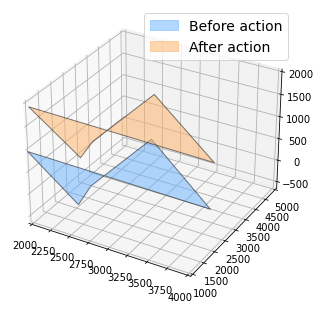

In [8]:
fig = plt.figure(); ax = Axes3D(fig)
ax.set_xlim((2000, 4000))
ax.set_ylim((1000, 5000))
ax.set_zlim((-600, 2000))

for label, nerve in enumerate([one_nerve, translated]):
    x = nerve[:, 0]
    y = nerve[:, 1]
    z = nerve[:, 2]

    verts = [list(zip(x, y, z))]

    poly = Poly3DCollection(verts, alpha=0.5)
    color = label_to_color[int(label)]
    poly.set_color(colors.rgb2hex(color))
    poly.set_edgecolor("k")
    ax.add_collection3d(poly)

patch_0 = mpatches.Patch(color=label_to_color[0], label=label_to_str[0], alpha=0.5)
patch_1 = mpatches.Patch(color=label_to_color[1], label=label_to_str[1], alpha=0.5)
plt.legend(handles=[patch_0, patch_1], prop={"size": 14})
plt.show()

$\color{#EF5645}{\text{Definition}}$: We say that a set of landmarks is centered if its barycenter is at $0$.

$\color{#047C91}{\text{Example}}$: How would you center the optical nerve `one_nerve`?

In [12]:
import numpy as np
one_nerve = nerves[0]; print(one_nerve.shape); print("\n")
translation = - np.mean(centered, axis=0) ; 
centered = one_nerve + translation; 
print(np.mean(centered, axis=0))

(5, 3)


[0. 0. 0.]


### Example: Action of scalings

$\color{#EF5645}{\text{Definition}}$: Scaling a centered set of $k$ landmarks $X=\begin{bmatrix} x_1 \\ ... \\ x_k \end{bmatrix}$ by a factor $\alpha \in \mathbb{R}^*_+$ is performed through the operation:
$$\alpha X = \begin{bmatrix} \alpha x_1 \\ ... \\ \alpha x_k\end{bmatrix}.$$

This defines an action of the group of scalings $\mathbb{R}_+^*$ on the space $\mathbb{R}^{k \times m}$.

<center><img src="figs/02_triangles.png" width=200px alt="default"/></center>

### Example: Action of rotations

$\color{#EF5645}{\text{Definition}}$: Rotating a centered set of $k$ landmarks $X=\begin{bmatrix} x_1 \\ ... \\ x_k \end{bmatrix}$ by a rotation with matrix $R \in SO(m)$ is performed through the operation:
$$R \ast X = \begin{bmatrix} x_1.R^T \\ ... \\ x_k.R^T \end{bmatrix},$$
where $T$ denotes the transpose.
This defines an action of the group of rotations $SO(m)$ on the space $\mathbb{R}^{k \times m}$.

<center><img src="figs/02_triangles.png" width=200px alt="default"/></center>

$\color{#047C91}{\text{Example}}$: Consider the blue triangle below. What are the coordinates of that triangle rotated by an angle of $\pi / 3$ ? Can you write the formula that rotates any triangle in 2D by a rotation of angle $\theta$?

<center><img src="figs/02_triangles.png" width=400px alt="default"/></center>

In [15]:
import math as m
import numpy as np

theta = np.pi / 6
rotation = np.array([[ m.cos(theta), -m.sin(theta), 0 ],
                     [ m.sin(theta), m.cos(theta) , 0 ],
                     [ 0           , 0            , 1 ]])

rotated = centered @ rotation.T
print(rotated.shape); print(one_nerve.shape)

(5, 3)
(5, 3)


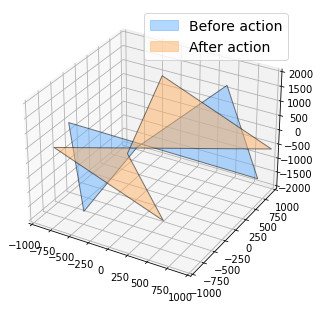

In [18]:
fig = plt.figure(); ax = Axes3D(fig)
ax.set_xlim((-1000,1000)); ax.set_ylim((-1000, 1000)); ax.set_zlim((-2000, 2000))

for label, nerve in enumerate([centered, rotated]):
    x = nerve[:, 0]; y = nerve[:, 1]; z = nerve[:, 2]
    verts = [list(zip(x, y, z))]

    poly = Poly3DCollection(verts, alpha=0.5)
    color = label_to_color[int(label)]
    poly.set_color(colors.rgb2hex(color))
    poly.set_edgecolor("k")
    ax.add_collection3d(poly)

patch_0 = mpatches.Patch(color=label_to_color[0], label=label_to_str[0], alpha=0.5); patch_1 = mpatches.Patch(color=label_to_color[1], label=label_to_str[1], alpha=0.5)
plt.legend(handles=[patch_0, patch_1], prop={"size": 14}); plt.show()

### Procrustes in Geometric Learning (Continued-2)


$\color{#EF5645}{\text{Definition}}$: Procrustes Analysis is a general method to perform statistical learning on shapes defined by sets of landmarks.

1. **Optimally "superimpose” objects $X_0, ..., X_n$: translate, rotate and possibly scale.**


2. Perform statistical learning on superimposed objectus.


<center><img src="figs/02_procrustes.png" width=900px alt="default"/></center>


$\color{#EF5645}{\text{Definitions}}$: 
- The barycenter of a set of landmarks is $\bar x = \frac{1}{k} \sum_{l=1}^k x_l$. 
- The size $s$ of a centered set of landmarks is $s^2 = \sum_{l=1}^k ||x_l||^2$. 


- Translating and rescaling the sets of landmarks amounts to "project" in a "pre-shape space".
  - $X$ is translated such that its barycenter is at 0.
  - $X$ is re-scaled such that its scale is 1.

In [23]:
from geomstats.geometry.pre_shape import PreShapeSpace
m_ambient = 3; k_landmarks = 5
preshape = PreShapeSpace(m_ambient=m_ambient, k_landmarks=k_landmarks)

nerves_preshape = preshape.projection(nerves)
#print("Check that the sets are centered:\n", np.mean(nerves_preshape, axis=1))
#print("Check that the sets have size 1:\n", np.linalg.norm(nerves_preshape, axis=(1,2)))

preshape.belongs(nerves_preshape)

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True])

- Aligning all the sets of landmarks to $X_0$ (with `align` method of the pre-shape space) amounts to "project" the preshapes into the "shape space", also called the "Kendall shape space".

In [24]:
base_nerve = nerves_preshape[0]  # X0

nerves_shape = preshape.align(
    point=nerves_preshape, base_point=base_nerve)

### Procrustes in Geometric Learning (Continued-3)


$\color{#EF5645}{\text{Definition}}$: Procrustes Analysis is a general method to perform statistical learning on shapes defined by sets of landmarks.

1. Optimally "superimpose” objects $X_0, ..., X_n$: translate, rotate and possibly scale.


2. **Perform statistical learning on superimposed objects.**


<center><img src="figs/02_procrustes.png" width=900px alt="default"/></center>


### Statistical Learning on superimposed objects

= amounts to perform statistics in the Kendall shape space.

The Kendall shape space is a manifold equipped with a Riemannian metric called the Kendall shape metric.

In [26]:
from geomstats.geometry.pre_shape import KendallShapeMetric

kendall_metric = KendallShapeMetric(
    m_ambient=m_ambient, k_landmarks=k_landmarks)

<center><img src="figs/01_triangles_2d.png" width=300px alt="default"/></center>

### Example: PCA in the shape space

$\color{#047C91}{\text{Example}}$: We use the Kendall shape metric to perform a (tangent) Principal Component Analysis (PCA) in the Kendall shape space, and determine if we see a difference in the shapes of the optical nerves.

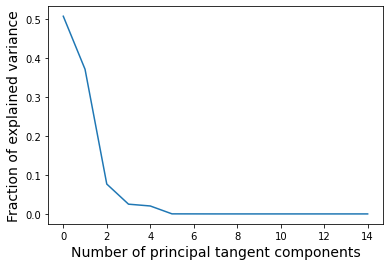

In [31]:
from geomstats.learning.pca import TangentPCA

tpca = TangentPCA(kendall_metric)
tpca.fit(nerves_shape)

plt.plot(tpca.explained_variance_ratio_)
plt.xlabel("Number of principal tangent components", size=14)
plt.ylabel("Fraction of explained variance", size=14);

Two principal components already describe around 60% of the variance. We plot the data projected in the tangent space defined by these two principal components.

In [32]:
label_to_str = {0: "Normal", 1: "Glaucoma"}
label_to_color = {
    0: (102 / 255, 178 / 255, 255 / 255, 1.0),
    1: (255 / 255, 178 / 255, 102 / 255, 1.0),
}

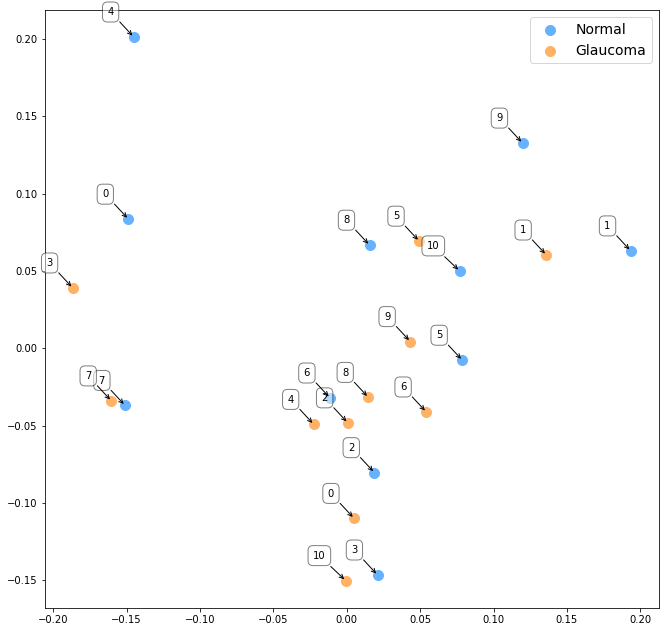

In [34]:
X = tpca.transform(nerves_shape); plt.figure(figsize=(11, 11))
for label, col in label_to_color.items():
    mask = labels == label; plt.scatter(X[mask, 0], X[mask, 1], color=col, s=100, label=label_to_str[label])
plt.legend(fontsize=14)
for label, x, y in zip(monkeys, X[:, 0], X[:, 1]):
    plt.annotate(
        label,xy=(x, y),xytext=(-20, 20),textcoords="offset points",ha="right",va="bottom",
        bbox=dict(boxstyle="round,pad=0.5", fc="white", alpha=0.5),arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=0"),
    )
plt.show()

Visual inspection:
- does not reveal any clusters between the glaucoma and normal optical nerves' shapes. 
- does not reveal any obvious pattern between the two optical nerves of the same monkey.

$\rightarrow$ Advise the clinician to select another set of landmarks to see a difference.


<center><img src="figs/01_optic_nerves.png" width=400px alt="default"/></center>
<center>Comparison of optic nerve heads in monkeys with and without glaucoma.</center>

# Theory: Kendall Shape Spaces

### Mysteries of Procrustes Analysis

We need some theory to address the following questions:
- What is the effect of the Procrustes preprocessing?
- ...We actually know that it projects the data into a curved shape space: Why?


$\rightarrow$ Understanding the geometry provides answers.

<center><img src="figs/02_procrustes.png" width=600px alt="default"/></center>

### Group Action and Their Orbits

$\color{#EF5645}{\text{Definition}}$: We define the orbit of a set of landmarks $X \in \mathbb{R}^{k \times m}$ under the action of the group $G$ as: 
$$O_X = G * X=\{g * X \mid g \in G\}.$$

- The orbit of $X$ represent all objects with the same shape as $X$.

$\color{#047C91}{\text{Examples}}$: 
- Consider sets of 2 landmarks in 2D under the action of $SO(2)$. The orbit of one set $x$ of two landmarks is a circle. 

<center><img src="figs/02_2landmarks.png" width=300px alt="default"/></center>

### (Kendall) Shape Spaces

$\color{#EF5645}{\text{Definition}}$: 

- A shape space is defined as the space of the orbits under the action of some group $G$.
- The Kendall shape space is defined as the space of orbits of $\mathbb{R}^{k \times m } \setminus 0$ under the action of $\mathbb{R}^m$, $SO(m)$ and $\mathbb{R}_+^*$.



$\color{#047C91}{\text{Example}}$: What is the shape space in the example of the 2 landmarks with the action of $SO(2)$?


<center><img src="figs/02_2landmarks.png" width=500px alt="default"/></center>


### Example: Kendall Shape Spaces of Triangles in 2D

Schematic proof explaining why the space of triangular shapes is a sphere:

- Triangle object are described by elements $X$ in $\mathbb{R}^{3 \times 2}$.
- Centering removes 2 degrees of freedom: elements in $\mathbb{R}^{2 \times 2} = \mathbb{R}^4$.
- Forcing the scale to be 1: elements on a 3D hypersphere in $\mathbb{R}^4$.
- We draw its orbits by $SO(2)$ and remove them: elements on a 2D sphere.

<center><img src="figs/02_orbits_sphere.png" width=400px alt="default"/></center>
<center>Schematic illustration of the orbits of $SO(2)$ on the 3D hypersphere, represented as orbits of $SO(2)$ on the 2D sphere for convenience.</center>

<center><img src="figs/01_triangles_2d.png" width=900px alt="default"/></center>

### Example: Size-and-Shape Space of Triangles in 2D

What happens if we do not rescale? 

$\color{#EF5645}{\text{Definition}}$: The corresponding space is called "size-and-shape" space, or "form space".

Imagine several copies of this sphere, one for each size!

<center><img src="figs/01_triangles_2d.png" width=300px alt="default"/></center>

## Application: Innovation in Pelvis Surgery

### Severe Pelvis Injuries: "Open-Book"


Severe pelvic injuries, including open book dislocations:
- often come from a motor vehicle collision or fall from a significant height.
- have a high mortality rate of 10.4%, complications often occur at surgery and during infections after surgery.

<center><img src="figs/02_openbook.jpeg" width=400px alt="default"/></center>

### Goal: Surgical Planning of Pelvis Fracture Reduction

$\color{#EF5645}{\text{Questions}}$:
- Can we speed-up the surgery process by analyzing shape of pelvis & required internal fixations (bars, screws)?
- Can we design an internal surgery that would reduce risks of infection?

<center><img src="figs/02_pelvis.png" width=900px alt="default"/></center>

### Data: CT scans from 100 patients

Data acquired with a CT scan (2014):
- 100 patients: 52 males, 48 females and diversity of ages.
- 100 3D images of pelvis
  
$\rightarrow$ On each 3D image, 16 anatomical "landmarks" were recorded.

<center><img src="figs/02_pelvis_landmarks.png" width=900px alt="default"/></center>

### Method: Apply Procrustes Analysis (no scaling)



**1. Superimpose:**
  - via translation: Center the 16 landmarks.
  - via rotation: Align the 16 landmarks
 
2. Compute the mean shape and perform statistical analysis

<center><img src="figs/02_pelvis_superimpose.png" width=600px alt="default"/></center>


$\color{#EF5645}{\text{Remark}}$: We do want to take into account the scaling, as the size of the patient is important to decide which fixations to put in.

### Method: Apply Procrustes Analysis (no scaling)



1. Superimpose
 
**2. Compute the mean shape and perform statistical analysis**
- **[principal component analysis](https://en.wikipedia.org/wiki/Principal_component_analysis)** (see Unit 03)
- hypothesis testing: should we get two sets of fixations for males and females?

<center><img src="figs/02_pelvis_pca.png" width=1000px alt="default"/></center>




### Method: Apply Procrustes Analysis (no scaling)



1. Superimpose
 
**2. Compute the mean shape and perform statistical analysis**
- [principal component analysis](https://en.wikipedia.org/wiki/Principal_component_analysis) (see Unit 03)
- **hypothesis testing: should we get two sets of fixations for males and females?**

<center><img src="figs/02_pelvis_ttest.png" width=900px alt="default"/></center>




# Outline

- **Unit 2 (Shapes): Computational Representations of Biomedical Shapes**
  - **A) Shapes of landmarks**
    - Motivation: Shape of Glaucoma
    - Practice: Procrustes Analysis
    - Theory: Kendall Shape Spaces
    - Application: Innovation in Pelvis Surgery
  - B) Shapes of curves
  - C) Shapes of surfaces
  - D) Graphs
  - E) Deformations
  
Questions?

- Guigui, Miolane, Pennec (2022). Introduction to Riemannian Geometry and Geometric Statistics.
- Miolane, Devilliers, Pennec (2020). Bias on estimation in quotient space and correction methods: Applications to statistics on organ shapes.